In [1]:
# Including The Dependencies

In [47]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,classification_report

In [3]:
# Collection data set and preprocessing

In [12]:
data = pd.read_csv('news_dataset.csv')

In [13]:
data.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [14]:
data.isnull().sum()

label    0
text     8
dtype: int64

In [15]:
data.shape

(3729, 2)

In [17]:
data['text'] = data['text'].fillna(data['text'].mode()[0])

In [18]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [20]:
keep_words = {"not", "never", "no", "must", "should", "could", "may", 
              "he", "she", "they", "you", "we", "very", "really", "just", "only", 
              "because", "however", "therefore"}

stop_word = set(stopwords.words('english')) - keep_words

In [22]:
len(stop_word)

186

In [27]:
stop_list = list(stop_word) + list(punctuation)

In [28]:
lemi = WordNetLemmatizer()

In [34]:
def processing_task(txt):
    words = re.sub(r'[^a-zA-Z0-9]', ' ', txt)
    words = word_tokenize(txt)
    words = [lemi.lemmatize(word.lower()) for word in words if word.lower() not in stop_list]
    
    return ' '.join(words)

In [35]:
data['text'] = data['text'].apply(processing_task)

In [36]:
data.loc[0]['text']

'payal accused filmmaker anurag kashyap behaving inappropriately video went viral she maintained stance speaking etimes said “ wanted speak long time today finally thought must get head tweeted incident sometime ago metoo movement happened many people told delete tweet else would stop getting work manager advised remove tweet complied post anurag blocked whatsapp ”'

In [38]:
def remove_emoji(txt):
    new = " "
    for i in txt:
        if i.isascii():
            
            new = new + i
    return new    

In [39]:
data['text'] = data['text'].apply(remove_emoji)

In [40]:
def remove_url(txt):
    new = " "
    for i in txt:
        if not i.startswith(('http', 'www')):
            new = new + i
    return new        

In [41]:
data['text'] = data['text'].apply(remove_url)

In [42]:
data.loc[0]['text']

'  payal accused filmmaker anurag kashyap behaving inappropriately video went viral she maintained stance speaking etimes said  wanted speak long time today finally thought must get head tweeted incident sometime ago metoo movement happened many people told delete tweet else would stop getting work manager advised remove tweet complied post anurag blocked whatsapp '

In [43]:
data['label'].value_counts()

label
FAKE    1877
REAL    1852
Name: count, dtype: int64

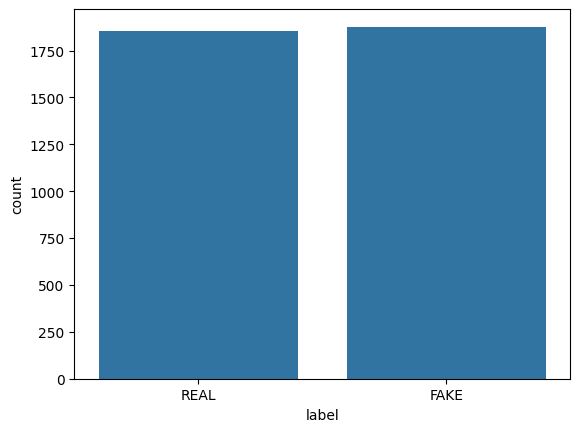

In [44]:
sns.countplot(x='label',data=data)
plt.show()

In [45]:
data['label'] = data['label'].map({"REAL" : 0, "FAKE": 1})

In [46]:
data['label'].value_counts()

label
1    1877
0    1852
Name: count, dtype: int64

In [48]:
# Divide into Train and Test Data Set

In [50]:
x = data['text']
y= data['label']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)

In [53]:
x.shape, x_train.shape, x_test.shape, y_train.shape

((3729,), (2983,), (746,), (2983,))

In [54]:
tf = TfidfVectorizer()
tf.fit(x_train)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [55]:
x_train = tf.transform(x_train).toarray()

In [59]:
x_test = tf.transform(x_test).toarray()

In [57]:
x_train[1]

array([0., 0., 0., ..., 0., 0., 0.], shape=(30077,))

In [61]:
lr = LogisticRegression()
lr.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [62]:
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(99.76533690915186, 99.59785522788204)

In [65]:
mse = mean_squared_error(y_test,lr.predict(x_test))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,lr.predict(x_test))
print(f"mean_squared_error {mse}")
print(f"mean_absolute_error {mae}")
print(f"root_mean_squared_error {rmse}")


mean_squared_error 0.004021447721179625
mean_absolute_error 0.004021447721179625
root_mean_squared_error 0.06341488564351137


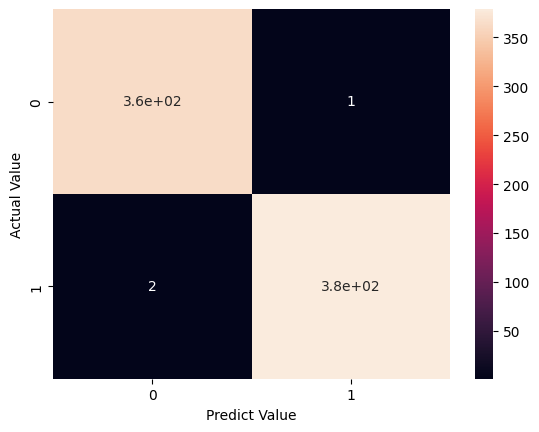

In [68]:
c = confusion_matrix(y_test,lr.predict(x_test))
sns.heatmap(c, annot=True)
plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

In [70]:
print("Classical Model details here : " ,classification_report(y_test,lr.predict(x_test)))

Classical Model details here :                precision    recall  f1-score   support

           0       0.99      1.00      1.00       365
           1       1.00      0.99      1.00       381

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746



In [71]:
# Testing model using Train Data

In [84]:
sample = x_train[74]
sample_arr = np.array(sample)
re_sample = sample_arr.reshape(1,-1)

In [85]:
lr.predict(re_sample)

array([1])

In [86]:
y_train.values[74]

np.int64(1)

In [87]:
# Save and Load model and test with Test and random data

In [88]:
from joblib import dump, load

In [89]:
dump(lr, "Fake_news_prediction.ipynb")

['Fake_news_prediction.ipynb']

In [90]:
model = load('Fake_news_prediction.ipynb')

In [102]:
te_sample = x_test[4]
te_sample_arr = np.array(te_sample)
re_sample_t = te_sample_arr.reshape(1,-1)

In [103]:
prediction = model.predict(re_sample_t)
prediction

array([0])

In [104]:
y_test.values[4]

np.int64(0)

In [105]:
print("This news is Real" if prediction == 0 else "This news is Fake")

This news is Real


In [111]:
# sample_data = ["""Here are the latest headlines as of today, 
# 15 January 2026:Maharashtra civic elections exit polls predict a massive win for the BJP-led alliance,
# Air India’s New York-bound flight was diverted and later damaged after hitting a foreign object in Delhi, 
# and actor Vijay’s much-anticipated film Jana Nayagan faces a setback with the Supreme Court directing makers to approach the High Court."""]
sample_data = ["Aliens spotted in Bengaluru East",
    "Celebrity secretly rules the world",
    "New miracle pill cures all diseases"]


sample_data_proc = [processing_task(s) for s in sample_data]
sample_data_vec = tf.transform(sample_data_proc)
predictions = model.predict(sample_data_vec)


for text, pred in zip(sample_data, predictions):
    print(f"Text: {text}\nPrediction: {'This news is : Fake' if pred==1 else 'This news is : Real'}\n")

Text: Aliens spotted in Bengaluru East
Prediction: This news is : Fake

Text: Celebrity secretly rules the world
Prediction: This news is : Real

Text: New miracle pill cures all diseases
Prediction: This news is : Real

